In [91]:
# Global Tools
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import scipy.stats as ss
import yfinance as yf

from cycler import cycler
from datetime import datetime
from ipywidgets import interact, FloatSlider, IntSlider, Dropdown, SelectMultiple, fixed
from IPython.core.interactiveshell import InteractiveShell
from pandas_datareader import DataReader
from scipy.stats import gaussian_kde
from scipy.optimize import minimize
from scipy.signal import find_peaks
from tqdm import tqdm


##### Global Settings

In [92]:
# display all outputs of a cell
# InteractiveShell.ast_node_interactivity = "all"

In [93]:
# global setting for plt
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 150
plt.style.use('dark_background')
plt.rcParams['axes.prop_cycle'] = cycler(color=['#76B900', '#DC143C', '#002366', '#5A9BD5', '#A2AAAD', '#B03060'])


In [94]:
# Data initialization
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 8, 31)
stock_symbols = ['NVDA', 'AMD', 'INTC', 'QCOM', 'AAPL', 'AVGO']
stocks= yf.download(stock_symbols, start_date, end_date)['Adj Close']

[*********************100%***********************]  6 of 6 completed


##### Stock Price Curve

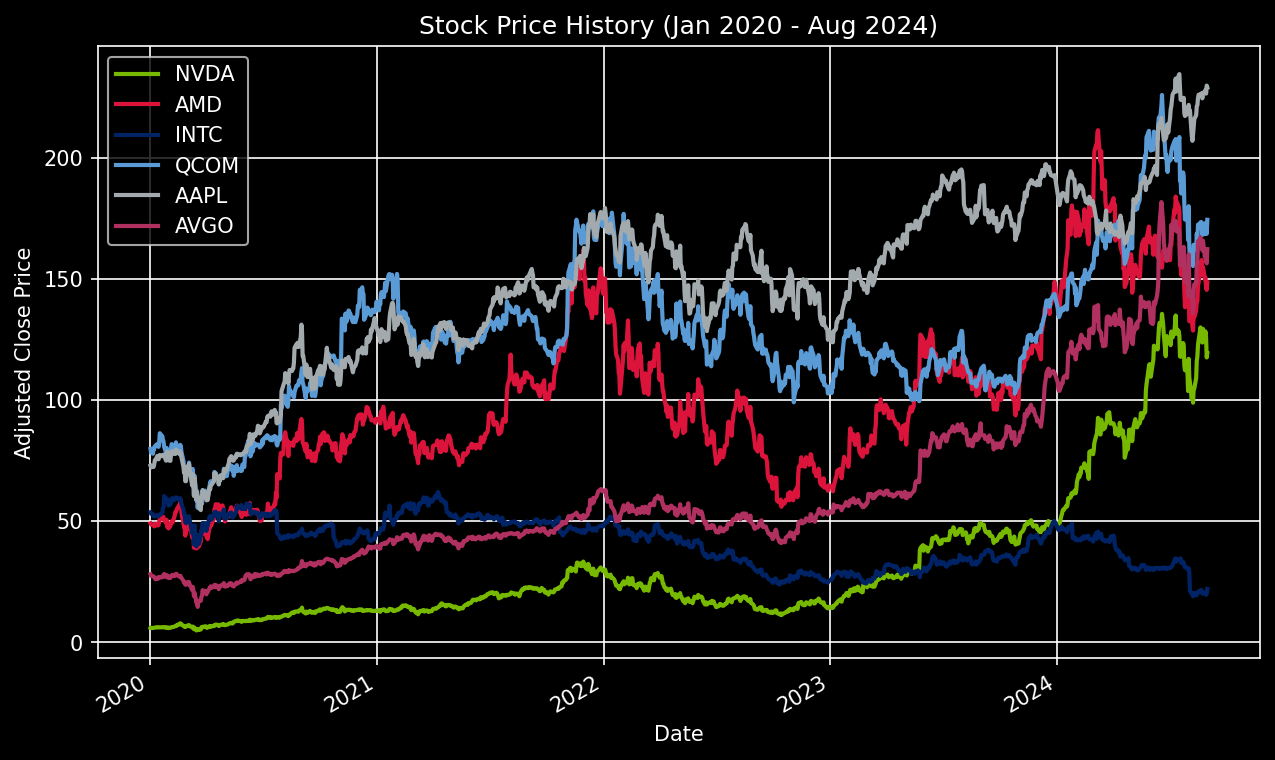

In [95]:
for ticker in stock_symbols:
    stocks[ticker].plot(label=ticker, linewidth=2)
plt.title("Stock Price History (Jan 2020 - Aug 2024)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.grid(True)
plt.show()

##### Means, Variance, Skewness, and Kurtosis

In [96]:
    
for ticker in stock_symbols:
    stock_prices = stocks[ticker]
    mean_price = stock_prices.mean()
    variance_price = stock_prices.var()
    skewness_price = ss.skew(stock_prices)
    kurtosis_price = ss.kurtosis(stock_prices)
    print(f"{ticker}:\n Mean: {mean_price}, Variance: {variance_price},\n Skewness: {skewness_price}, Kurtosis: {kurtosis_price}")


NVDA:
 Mean: 31.72555409338852, Variance: 879.408827629468,
 Skewness: 1.8799515491831735, Kurtosis: 2.771775066361128
AMD:
 Mean: 100.64815152442841, Variance: 1239.798089450361,
 Skewness: 0.6734634798536817, Kurtosis: -0.06924435787548067
INTC:
 Mean: 41.40178278804434, Variance: 97.54821966614959,
 Skewness: -0.16579819931641282, Kurtosis: -1.0295164614080747
QCOM:
 Mean: 126.9730174602398, Variance: 936.2664040059029,
 Skewness: 0.3084162435068555, Kurtosis: 0.4168101194260654
AAPL:
 Mean: 146.75708244687655, Variance: 1400.3759928252905,
 Skewness: -0.33844415032681685, Kurtosis: -0.1559720789172352
AVGO:
 Mean: 63.05962382792614, Variance: 1313.8634382712976,
 Skewness: 1.336985839086601, Kurtosis: 0.9558666735705894


##### Kernel Density Estimation (KDE)

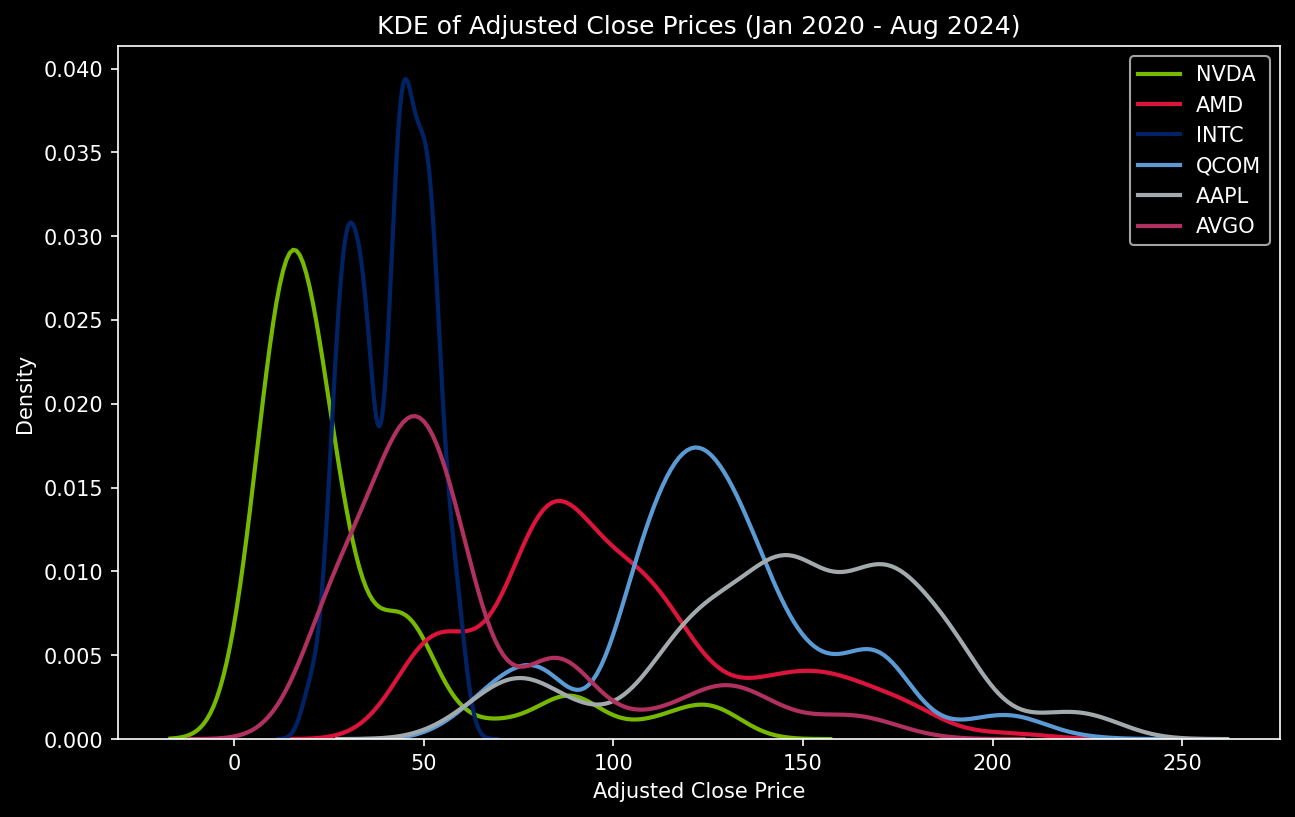

In [97]:
for ticker in stock_symbols:
    stock_prices = stocks[ticker].dropna()
    sns.kdeplot(stock_prices, label=f'{ticker}', linewidth=2)
plt.title("KDE of Adjusted Close Prices (Jan 2020 - Aug 2024)")
plt.xlabel("Adjusted Close Price")
plt.ylabel("Density")
plt.legend()
plt.show()

##### Mixture Modeling

NVIDIA stock sample mean: $31.72555409338852
NVIDIA stock sample standard deviation: $29.642195550900485


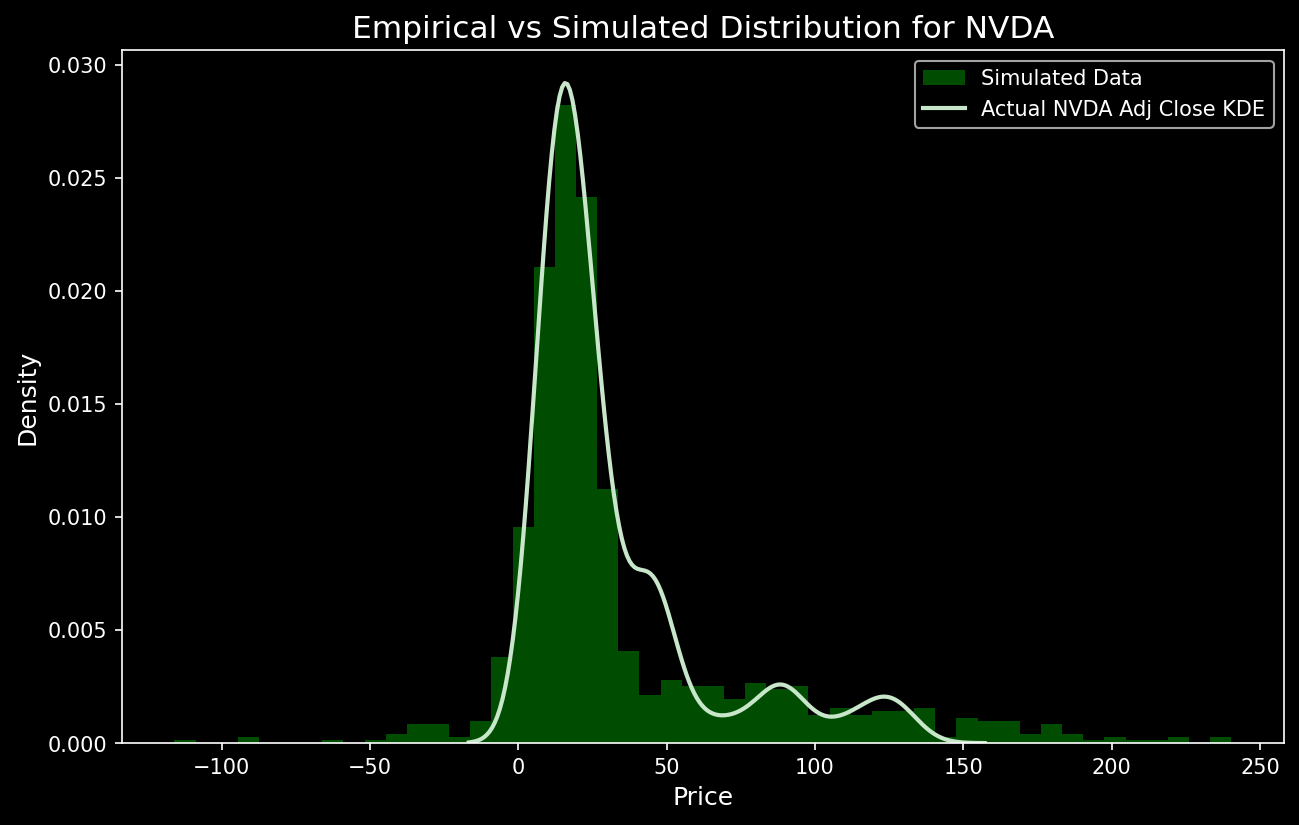

In [98]:
X = stocks['NVDA'].values
mu = np.mean(X)
se = np.std(X)
print(f"NVIDIA stock sample mean: ${mu}")
print(f"NVIDIA stock sample standard deviation: ${se}")

# Tuned parameters
mu_1 = 16  
sigma1 = 10
mu_2 = 80
sigma2 = 60
p = 0.7     
T = 1000

r = np.zeros(T)
for t in range(T):
    eps1 = np.random.normal(0, 1)
    eps2 = np.random.normal(0, 1)
    r1 = mu_1 + sigma1 * eps1 
    r2 = mu_2 + sigma2 * eps2  
    u = np.random.uniform(0, 1)
    r[t] = r1 * (u <= p) + r2 * (u > p)  
plt.hist(r, bins=50, density=True, alpha=0.6, color='green', label="Simulated Data")
sns.kdeplot(data=X, color='#C8E6C9', label='Actual NVDA Adj Close KDE', lw=2)
plt.title(f'Empirical vs Simulated Distribution for NVDA', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

##### Bootstrap

In [99]:
for symbol in stock_symbols:
     X = stocks[symbol].values
     # Bootstrap parameters
     T= X.shape[0]
     B = 1000 # 5000, 100000 [250 9750]
     # using round() instead of int() casting to reduce conversion error
     upper_bound = round(B * 0.975)
     lower_bound = round(B * 0.025)
     mu_boot = np.zeros(B)
     se_boot = np.zeros(B)
     x_boot_std = np.zeros(B)

    # Bootstrap
     for i in range(0, B):
          x_boot = X[np.random.choice(T,T)]
          mu_boot[i] = np.mean(x_boot)
          se_boot[i] = np.std(x_boot)/np.sqrt(T) # std of mu_boot
          x_boot_std[i] = np.std(x_boot) # std of x_boot
          # CLT: std(x_boost) = sqrt(T)*std(mu_boot)
     mu_boot = np.sort(mu_boot)
     se_boot = np.sort(se_boot)
     xboot_std = np.sort(x_boot_std)
    
     print(symbol)
     print("(",mu_boot[25],",", mu_boot[975],")")
     print("(",se_boot[25],",", se_boot[975],")")
     print("(",se_boot[25]*np.sqrt(T),",", se_boot[975]*np.sqrt(T),")")
     print("(",xboot_std[25],",", xboot_std[975],")")

NVDA
( 30.04484058360631 , 33.32147885749856 )
( 0.8100769897899219 , 0.9122220537488069 )
( 27.756221506185906 , 31.256087638344017 )
( 27.756221506185906 , 31.256087638344017 )
AMD
( 98.66117537204411 , 102.4540799740429 )
( 0.985156970173564 , 1.065893637373648 )
( 33.755106523383205 , 36.52144212693848 )
( 33.755106523383205 , 36.52144212693848 )
INTC
( 40.833408718011654 , 41.93916136402085 )
( 0.2798293364149205 , 0.2956158705372019 )
( 9.587983788399882 , 10.128888595517827 )
( 9.587983788399882 , 10.128888595517827 )
QCOM
( 125.21442461095027 , 128.64398991391442 )
( 0.8515663112299354 , 0.9289342563714131 )
( 29.17779848040536 , 31.828709257888615 )
( 29.17779848040536 , 31.828709257888615 )
AAPL
( 144.5797808872983 , 148.85627451869047 )
( 1.05208326181755 , 1.1336716288461302 )
( 36.04824779127654 , 38.843765768105555 )
( 36.04824779127654 , 38.843765768105555 )
AVGO
( 61.05764313004086 , 65.10389386490623 )
( 1.0050975322620166 , 1.1054692612034125 )
( 34.43834362956058 , 3

### Monte-Carlo

In [100]:
def monte_carlo_simulation(mu_1, sigma1, 
                           mu_2, sigma2, 
                           p, T=1000):
    r = np.zeros(T)
    for t in range(T):
        eps1 = np.random.normal(0,1,1)
        eps2 = np.random.normal(0,1,1)
        r1 = mu_1 + sigma1 * eps1
        r2 = mu_2 + sigma2 * eps2
        u = np.random.uniform(0,1,1)
        r[t] = r1*(u <= p)+r2*(u > p)
    
    return r

def simulation_image(parameters, save_path):
    current_X, mu_1, sigma1, mu_2, sigma2, p =  parameters[0], parameters[1], parameters[2],parameters[3], parameters[4], parameters[5]
 
    plt.figure(figsize=(10,6))
    fig, ax = plt.subplots()
    sns.kdeplot(data=current_X, linewidth=4)
    initalR = monte_carlo_simulation(mu_1, sigma1, mu_2, sigma2, p, T=1000)
    plt.hist(initalR, bins=100, density=True, alpha=0.6, color='green', label="Histogram")
    ax.legend([f'Empirical Kernal Distribution: {save_path}', 'Mixture Model Simulated Distribution'])
    plt.title(f'Monte Carlo Simulation\n,sigma1={sigma1},sigma2={sigma2}')
    ## Save Image
    imagePath = os.path.join(save_path,f"{save_path},sigma1={sigma1},sigma2={sigma2}'.png")
    
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    plt.savefig(imagePath)

def calculateOverlap(parameters):
    
    current_X, mu_1, sigma1, mu_2, sigma2, p =  parameters[0], parameters[1], parameters[2],parameters[3], parameters[4], parameters[5]
    r = monte_carlo_simulation(mu_1, sigma1, 
                               mu_2, sigma2, 
                          p)
    
    histArea, bin_edges = np.histogram(r, bins=100, density=True)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    
    kde = gaussian_kde(current_X)
    kdeArea = kde(bin_centers)
    
    overlap = np.minimum(histArea, kdeArea)
    return scipy.integrate.simps(overlap, bin_centers)

# Loop 

def optimize_parameters(parameters, save_path, step=5):
    bestArea = 0
    bestParam = []
    sigma1, sigma2 =  parameters[2], parameters[4]
    
    if sigma2>sigma1:
        sigma1_range = np.arange(sigma1-step, sigma1+step, 1)
        sigma2_range = np.arange(int(np.floor(sigma2-step*2)), sigma2+step*2, 1)

    else:
        sigma2_range = np.arange(sigma1-step, sigma1+step, 1)
        sigma1_range = np.arange(int(np.floor(sigma2-step*2)), sigma2+step*2, 1)
    
    for i in tqdm(sigma1_range):
        for j in sigma2_range:
            current_parameters = parameters.copy()
            parameters[2] = i
            parameters[4] = j
            #simulation_image(parameters, save_path)
            
            overlapArea = calculateOverlap(current_parameters)
            
            if bestArea < overlapArea:
                bestArea = overlapArea
                bestParam = current_parameters
    return bestParam

##### Get mu_1, mu_2

Peaks corresponding x values: [ 47.8587351   84.34170805 129.66903808]
Valleys corresponding x values: [ 75.49735097 107.55814538]


C:\Users\56111\AppData\Local\Temp\ipykernel_31640\2119875184.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(peak_x_values, y[peaks], "ro", label='Peaks', color = '#FF6F91')


<Figure size 1500x900 with 0 Axes>

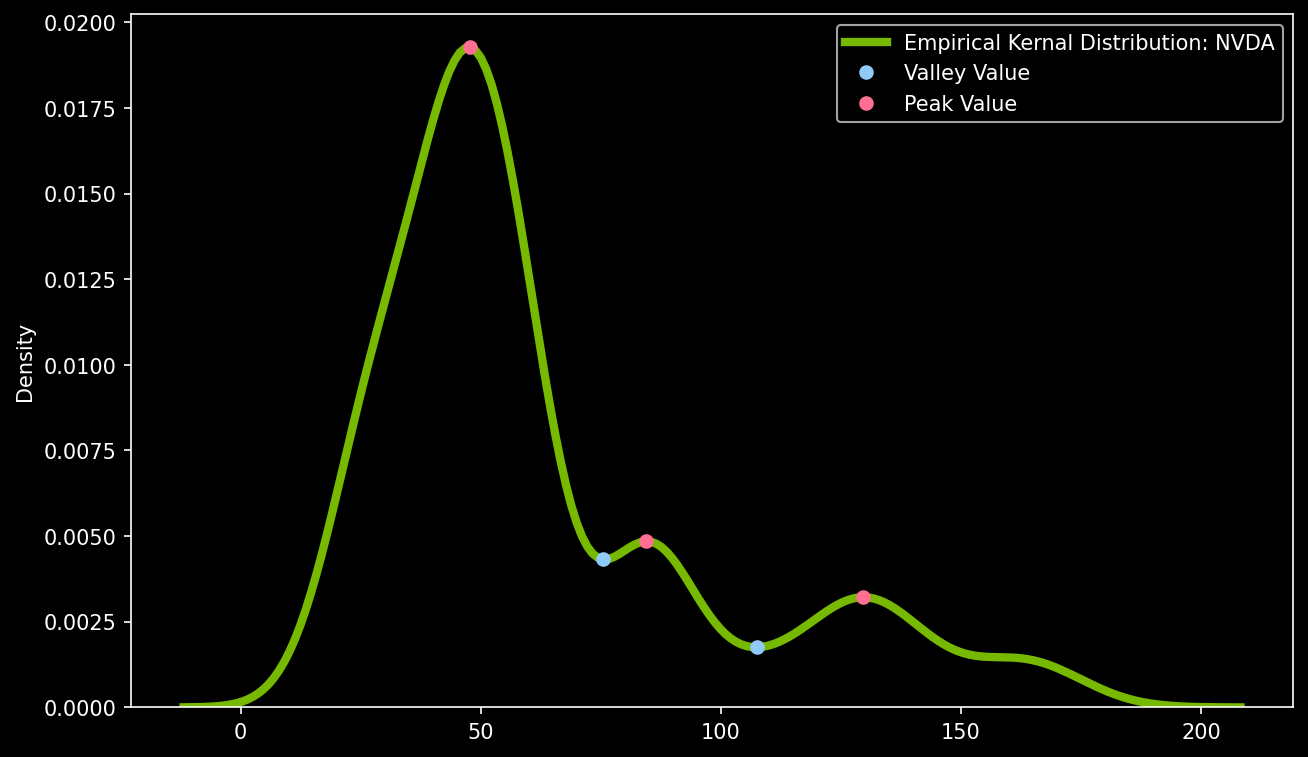

In [101]:
close_data = {}
for symbol in stock_symbols:
    close_data[symbol] = X
current_X = close_data['NVDA']
stock_symbol =  'NVDA'

# Plotting the histogram of r
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()

# Calculate the peak value
sns_kde = sns.kdeplot(data=current_X , linewidth=4)
x, y = sns_kde.get_lines()[0].get_data()

peaks, _ = find_peaks(y)
peak_x_values = x[peaks]

valleys, _ = find_peaks(-y)  # Negate y to find valleys
valleys, _ = find_peaks(-y) 

print("Peaks corresponding x values:", x[peaks])
print("Valleys corresponding x values:", x[valleys])

plt.plot(x[valleys], y[valleys], "o", label='Valleys', color = '#90CAF9')  
plt.plot(peak_x_values, y[peaks], "ro", label='Peaks', color = '#FF6F91')

ax.legend([f'Empirical Kernal Distribution: {stock_symbol}', 
           'Valley Value',
           'Peak Value'])

##### Calculate P

In [102]:
cut_point = 68.91934158

# Calculate the total area
total_area = scipy.integrate.simps(y, x)
print("Total Area:", total_area)

# Calculate the specific area between 0 and cut_point
mask = (x >= 0) & (x <= cut_point)
area_between = scipy.integrate.simps(y[mask], x[mask])
print("Specific Area:", area_between)

# Calculate probability
p = area_between / total_area
print("Probability:", p)

Total Area: 0.9999917271424571
Specific Area: 0.7079927568703629
Probability: 0.7079986140420375


In [103]:
intcP = [close_data['INTC'], 30, 4, 45, 7, 0.39]
nvdiaP = [close_data['NVDA'], 16, 20, 88, 40, 0.8455528001447512]
parameters = nvdiaP
stock_symbol="nvda"

<Figure size 1500x900 with 0 Axes>

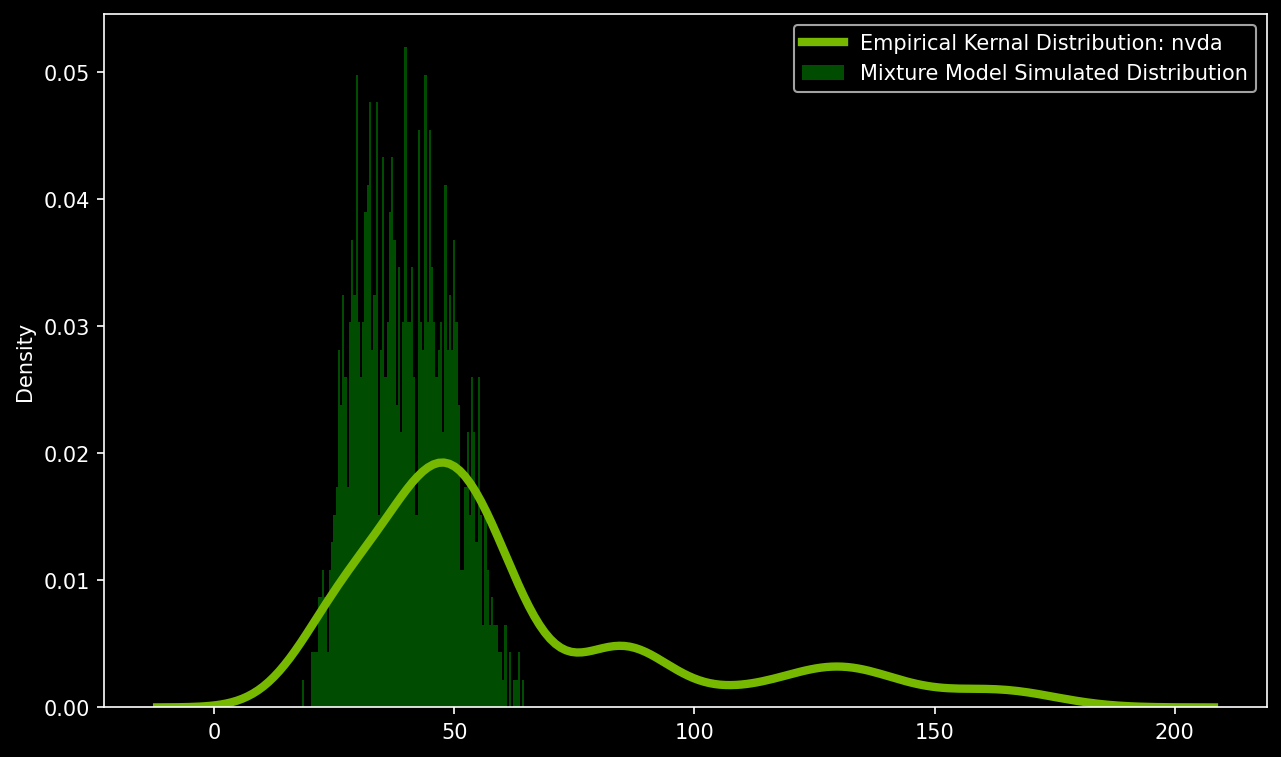

In [104]:
current_X, mu_1, sigma1, mu_2, sigma2, p =  intcP = close_data['INTC'], 30, 4, 45, 7, 0.35
initalR = monte_carlo_simulation(mu_1, sigma1, mu_2, sigma2, p, T=1000)

plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
sns.kdeplot(data=current_X, linewidth=4)
plt.hist(initalR, bins=100, density=True, alpha=0.6, color='green', label="Histogram")
ax.legend([f'Empirical Kernal Distribution: {stock_symbol}', 'Mixture Model Simulated Distribution'])

##### Repeat to tune all parameters

In [105]:
nvdiaP = [close_data['NVDA'], 16, 13, 88, 35, 0.8]
amdP = [close_data['AMD'], 86.20013076, 25, 151.50455195, 24, 0.8200047346930525]
intcP = [close_data['INTC'], 30, 4, 45, 7, 0.39]
qcomP = [close_data['QCOM'], 70, 15, 123, 27, 0.15]
aaplP = [close_data['AAPL'], 70, 19, 154, 34,0.15]
avgoP = [close_data['AVGO'], 45, 19, 128, 34, 0.82]

initialParams = dict(zip(stock_symbols, [nvdiaP, amdP, intcP, qcomP, aaplP, avgoP]))
bestParam = {}
for company, params in initialParams.items():
    best_param = optimize_parameters(params, company, step=7)
    bestParam[company] = best_param

100%|██████████| 14/14 [00:06<00:00,  2.00it/s]


In [106]:
# output images are located in "./resources/output.7z"
pd.DataFrame(bestParam).drop(index=0).T

,1,2,3,4,5
NVDA,16,19,88,44,0.8
AMD,86.200131,35,151.504552,18,0.820005
INTC,30,10,45,18,0.39
QCOM,70,18,123,39,0.15
AAPL,70,14,154,43,0.15
AVGO,45,18,128,35,0.82


In [107]:
# Define the function for the Monte Carlo stock price simulation
def monte_carlo_stock_price_interactive(S0=100, mu=0.05, sigma=0.2, T=1, N=252, num_simulations=100):
    """
    Interactive Monte Carlo simulation for stock price based on Geometric Brownian Motion.

    Parameters:
    S0: Initial stock price
    mu: Expected return
    sigma: Volatility
    T: Time period (in years)
    N: Number of time steps (daily steps for 1 year)
    num_simulations: Number of simulations

    Returns:
    None (plots the stock price simulations)
    """

    # Time step size
    dt = T / N

    # Running Monte Carlo simulations
    simulations = np.zeros((num_simulations, N))
    for i in range(num_simulations):
        # Generate random changes based on normal distribution
        rand_changes = np.random.normal(mu * dt, sigma * np.sqrt(dt), N)
        # Simulate the price path
        simulations[i, :] = S0 * np.exp(np.cumsum(rand_changes))

    # Plotting the simulations
    plt.figure(figsize=(10, 6))
    for i in range(num_simulations):
        plt.plot(simulations[i, :], color='lightblue', linewidth=0.5)
    plt.xlabel('Time Step (Days)')
    plt.ylabel('Stock Price')
    plt.title(f'Monte Carlo Simulations of Stock Price\nS0={S0}, mu={mu}, sigma={sigma}, T={T}, N={N}, simulations={num_simulations}')
    plt.show()

# Create sliders to change parameters interactively
interact(
    monte_carlo_stock_price_interactive,
    S0=FloatSlider(value=100, min=50, max=150, step=1, description='Initial Price S0'),
    mu=FloatSlider(value=0.05, min=-0.1, max=0.1, step=0.01, description='Expected Return (mu)'),
    sigma=FloatSlider(value=0.2, min=0.05, max=0.5, step=0.01, description='Volatility (sigma)'),
    T=FloatSlider(value=1, min=0.5, max=5, step=0.5, description='Time Period (T)'),
    N=IntSlider(value=252, min=50, max=500, step=10, description='Time Steps (N)'),
    num_simulations=IntSlider(value=100, min=10, max=500, step=10, description='Simulations')
)


interactive(children=(FloatSlider(value=100.0, description='Initial Price S0', max=150.0, min=50.0, step=1.0),…

<function __main__.monte_carlo_stock_price_interactive(S0=100, mu=0.05, sigma=0.2, T=1, N=252, num_simulations=100)>